0.012308996455744264


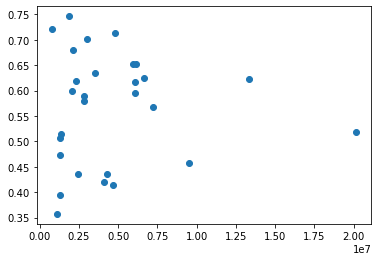

In [1]:
#~~Step 1 - Correlate Metro Population with W/L for NHL
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
import matplotlib.pyplot as plt

#~~Read NHL data and filter to year 2018

nhl_df=pd.read_csv("nhl.csv")
nhl_df = nhl_df[(nhl_df['year']==2018)]
#~~Clean team names
nhl_df['team']=nhl_df['team'].str.replace('*','',regex=True)
nhl_df['TeamName']=nhl_df['team'].str.extract('.*\s*.*\s(.*$)')
nhl_df['TeamName'].replace({'Wings':'Red Wings','Leafs':'Maple Leafs','Jackets':'Blue Jackets','Knights':'Golden Knights'},inplace=True)
# print(nhl_df)
cities=pd.read_html("wikipedia_data.html")[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]].reset_index()

#~~Split out team names from their string to get each individually and join on that later
cities['NHL']=cities['NHL'].str.replace('\[.*\]','',regex=True)
cities['NHL']=cities['NHL'].str.split('([A-Z][a-z]*[a-z])([A-Z][a-z]*)')

df=cities
lst_col = 'NHL'
#~~~ Found online, a way to take a list of values from a column (NHL in my case) and put them one-to-a-row in the Dataframe
#https://stackoverflow.com/questions/27263805/pandas-column-of-lists-create-a-row-for-each-list-element
r = pd.DataFrame({
      col:np.repeat(df[col].values, df[lst_col].str.len())
      for col in df.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns]
r.set_index('NHL').sort_values(by='NHL')
nhl_df.set_index('TeamName').sort_values(by='TeamName')

df2=pd.merge(nhl_df,r,how='inner',left_on='TeamName',right_on='NHL').sort_values(by='NHL')
df2['W']=df2['W'].astype('int')
df2['L']=df2['L'].astype('int')
df2['pop']=df2['Population (2016 est.)[8]'].astype('int')
# print(df2)
asd2 = df2.groupby(['Metropolitan area','Population (2016 est.)[8]']).agg({'W':np.sum,'L':np.sum,'pop':np.mean})
asd2['WL']=asd2['W']/(asd2['L']+asd2['W'])

# print(asd2)
# print(asd2.shape)

def nhl_correlation(): 
    population_by_region = asd2['pop'].values # pass in metropolitan area population from cities
    win_loss_by_region = asd2['WL'].values # pass in win/loss ratio from nhl_df in the same order as cities["Metropolitan area"]

    assert len(population_by_region) == len(win_loss_by_region), "Q1: Your lists must be the same length"
    assert len(population_by_region) == 28, "Q1: There should be 28 teams being analysed for NHL"
    
    return stats.pearsonr(population_by_region, win_loss_by_region)[0]
    raise NotImplementedError()
print(nhl_correlation())

plt.scatter(asd2['pop'].values,asd2['WL'].values)
asdnhl = asd2
def retnhl():
    return asdnhl

-0.17657160252844617


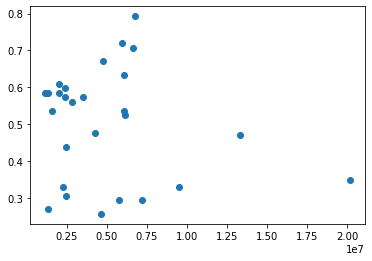

In [2]:
#~~Step 2 - Correlate Metro Population with W/L for NBA
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
import matplotlib.pyplot as plt

NBA_df=pd.read_csv("nba.csv")
NBA_df = NBA_df[(NBA_df['year']==2018)]
NBA_df['team']=NBA_df['team'].str.replace('\(.*\)','',regex=True)
NBA_df['team']=NBA_df['team'].str.replace('\*','',regex=True).str.strip()
NBA_df['TeamName']=NBA_df['team'].str.extract('([A-Za-z0-9]*$)')
NBA_df['TeamName'].replace({'Blazers':'Trail Blazers','Leafs':'Maple Leafs','Jackets':'Blue Jackets','Knights':'Golden Knights'},inplace=True)
# print(NBA_df)
cities=pd.read_html("wikipedia_data.html")[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]].reset_index()

#~~Clean and split out team names from their string to get each individually and join on that later
cities['NBA']=cities['NBA'].str.replace('\[.*\]','',regex=True)
cities['NBA']=cities['NBA'].str.split('([A-Z][a-z]*[0-9a-z])([A-Z][a-z]*)')
# print(cities)

df=cities
lst_col = 'NBA'
#~~~ Found online, a way to take a list of values from a column (NBA in my case) and put them one-to-a-row in the Dataframe
#https://stackoverflow.com/questions/27263805/pandas-column-of-lists-create-a-row-for-each-list-element
r = pd.DataFrame({
      col:np.repeat(df[col].values, df[lst_col].str.len())
      for col in df.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns]
r.set_index('NBA').sort_values(by='NBA')
NBA_df.set_index('TeamName').sort_values(by='TeamName')
# r.join(cities,how='inner',on=index)
df2=pd.merge(NBA_df,r,how='inner',left_on='TeamName',right_on='NBA').sort_values(by='NBA')

asd1 = NBA_df['TeamName'].values

dsa1 = r['NBA'].values
# print(dsa1)
# print(np.setdiff1d(asd1,dsa1))

df2['W']=df2['W'].astype('int')
df2['L']=df2['L'].astype('int')
df2['pop']=df2['Population (2016 est.)[8]'].astype('int')
# print(df2)
asd2 = df2.groupby(['Metropolitan area','Population (2016 est.)[8]']).agg({'W':np.sum,'L':np.sum,'pop':np.mean})
asd2['WL']=asd2['W']/(asd2['L']+asd2['W'])

# print(asd2)
# print(asd2.shape)


def nba_correlation(): 
    population_by_region = asd2['pop'].values # pass in metropolitan area population from cities
    win_loss_by_region = asd2['WL'].values # pass in win/loss ratio from NBA_df in the same order as cities["Metropolitan area"]

    assert len(population_by_region) == len(win_loss_by_region), "Q1: Your lists must be the same length"
    assert len(population_by_region) == 28, "Q1: There should be 28 teams being analysed for NBA"
    
    return stats.pearsonr(population_by_region, win_loss_by_region)[0]
    raise NotImplementedError()
print(nba_correlation())

plt.scatter(asd2['pop'].values,asd2['WL'].values)
asdnba = asd2
def retnba():
    return asdnba

0.1505230448710485


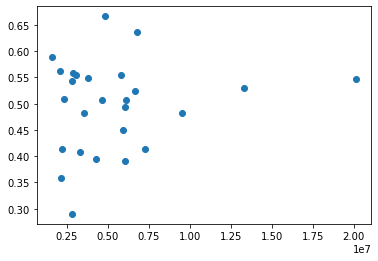

In [3]:
#~~Step 3 - Correlate Metro Population with W/L for MLB
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
import matplotlib.pyplot as plt

mlb_df=pd.read_csv("mlb.csv")
# print(nhl_df)
mlb_df = mlb_df[(mlb_df['year']==2018)]
mlb_df['team']=mlb_df['team'].str.replace('*','',regex=True)
#~~Pulling the last word of the team to avoid pulling metro. Unfortunately I also don't pull two-name teams like Red Sox or Blue Jays so I fix that later
mlb_df['TeamName']=mlb_df['team'].str.extract('.*\s*.*\s(.*$)')
#~~Manually fix the Boston Red Sox name
mlb_df.at[0,'TeamName']='Red Sox'
mlb_df['TeamName'].replace({'Jays':'Blue Jays','Sox':'White Sox','Jackets':'Blue Jackets','Knights':'Golden Knights'},inplace=True)
# print(mlb_df)
cities=pd.read_html("wikipedia_data.html")[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]].reset_index()
# print(cities)

#~~Clean and split out team names from their string to get each individually and join on that later
cities['MLB']=cities['MLB'].str.replace('\[.*\]','',regex=True)
cities['MLB']=cities['MLB'].str.replace(r'([a-z])([A-Z])',r'\1$\2',regex=True)
cities['MLB']=cities['MLB'].str.split('$')


df=cities
# print(df)
lst_col = 'MLB'
#~~~ Found online, a way to take a list of values from a column (MLB in my case) and put them one-to-a-row in the Dataframe
#https://stackoverflow.com/questions/27263805/pandas-column-of-lists-create-a-row-for-each-list-element
r = pd.DataFrame({
      col:np.repeat(df[col].values, df[lst_col].str.len())
      for col in df.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns]
r.set_index('MLB').sort_values(by='MLB')
mlb_df.set_index('TeamName').sort_values(by='TeamName')
# r.join(cities,how='inner',on=index)
df2=pd.merge(mlb_df,r,how='inner',left_on='TeamName',right_on='MLB').sort_values(by='MLB')
# print(df2)
# print(df2.shape)

asd1 = mlb_df['TeamName'].values

dsa1 = r['MLB'].values
#~~Make sure every team name is included (was missing Red Sox earlier and added up top)
# print(mlb_df['TeamName'],mlb_df['TeamName'].isin(dsa1))

df2['W']=df2['W'].astype('int')
df2['L']=df2['L'].astype('int')
df2['pop']=df2['Population (2016 est.)[8]'].astype('int')
# print(df2)
asd2 = df2.groupby(['Metropolitan area','Population (2016 est.)[8]']).agg({'W':np.sum,'L':np.sum,'pop':np.mean})
asd2['WL']=asd2['W']/(asd2['L']+asd2['W'])

# print(asd2)
# print(asd2.shape)


def mlb_correlation(): 
    population_by_region = asd2['pop'].values # pass in metropolitan area population from cities
    win_loss_by_region = asd2['WL'].values # pass in win/loss ratio from nhl_df in the same order as cities["Metropolitan area"]

    assert len(population_by_region) == len(win_loss_by_region), "Q1: Your lists must be the same length"
    assert len(population_by_region) == 26, "Q1: There should be 26 teams being analysed for MLB"
    
    return stats.pearsonr(population_by_region, win_loss_by_region)[0]
    raise NotImplementedError()
print(mlb_correlation())

plt.scatter(asd2['pop'].values,asd2['WL'].values)
asdmlb = asd2
def retmlb():
    return asdmlb

0.004922112149349456


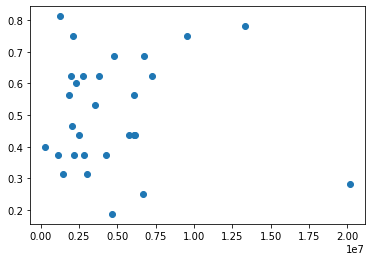

In [4]:
#~~Step 4 - Correlate Metro Population with W/L for NFL
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
import matplotlib.pyplot as plt

nfl_df=pd.read_csv("nfl.csv")
# print(nfl_df)
nfl_df = nfl_df[(nfl_df['year']==2018)]
nfl_df['team']=nfl_df['team'].str.replace('*','',regex=True)
nfl_df['team']=nfl_df['team'].str.replace('+','',regex=True)
nfl_df['TeamName']=nfl_df['team'].str.extract('.*\s*.*\s(.*$)')

nfl_df['TeamName'].replace({'Jays':'Blue Jays','Sox':'White Sox','Jackets':'Blue Jackets','Knights':'Golden Knights'},inplace=True)
# print(nfl_df)
cities=pd.read_html("wikipedia_data.html")[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]].reset_index()
#~~Clean and split out team names from their string to get each individually and join on that later
cities['NFL']=cities['NFL'].str.replace('\[.*\]','',regex=True)
cities['NFL']=cities['NFL'].str.replace('\+','',regex=True)
cities['NFL']=cities['NFL'].str.replace(r'([a-z])([A-Z])',r'\1$\2',regex=True)
cities['NFL']=cities['NFL'].str.split('$')

df=cities
# print(df)
lst_col = 'NFL'
#~~~ Found online, a way to take a list of values from a column (NFL in my case) and put them one-to-a-row in the Dataframe
#https://stackoverflow.com/questions/27263805/pandas-column-of-lists-create-a-row-for-each-list-element
r = pd.DataFrame({
      col:np.repeat(df[col].values, df[lst_col].str.len())
      for col in df.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns]
r.set_index('NFL').sort_values(by='NFL')
nfl_df.set_index('TeamName').sort_values(by='TeamName')
# r.join(cities,how='inner',on=index)
df2=pd.merge(nfl_df,r,how='inner',left_on='TeamName',right_on='NFL').sort_values(by='NFL')
# print(df2)
# print(df2.shape)
# print(df2)
# print(nfl_df)

asd1 = nfl_df['TeamName'].values
# print(asd1)
# # print(asd1.shape)

dsa1 = r['NFL'].values
# print(dsa1)
# print(np.setdiff1d(asd1,dsa1))

# print(df2.shape)
# print(df2.columns)
df2['W']=df2['W'].astype('int')
df2['L']=df2['L'].astype('int')
df2['pop']=df2['Population (2016 est.)[8]'].astype('int')
# print(df2)
asd2 = df2.groupby(['Metropolitan area','Population (2016 est.)[8]']).agg({'W':np.sum,'L':np.sum,'pop':np.mean})
asd2['WL']=asd2['W']/(asd2['L']+asd2['W'])
# print(asd2)
# print(asd2.shape)

def nfl_correlation(): 
    # YOUR CODE HERE

    
    population_by_region = asd2['pop'].values # pass in metropolitan area population from cities
    win_loss_by_region = asd2['WL'].values # pass in win/loss ratio from nfl_df in the same order as cities["Metropolitan area"]

    assert len(population_by_region) == len(win_loss_by_region), "Q4: Your lists must be the same length"
    assert len(population_by_region) == 29, "Q4: There should be 29 teams being analysed for NFL"

    return stats.pearsonr(population_by_region, win_loss_by_region)[0]
    
    raise NotImplementedError()
plt.scatter(asd2['pop'].values,asd2['WL'].values)
asdnfl = asd2
print(nfl_correlation())
def retnfl():
    return asdnfl

In [5]:
#~~Step 5: For metro areas with at least one team in two different sports, test for data similarity between each combination.
#~~For example, for the cities that have both NHL and NBA teams, perform a t-test to see if their performance is very similar or not.
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

mlb_df=pd.read_csv("mlb.csv")
nhl_df=pd.read_csv("nhl.csv")
nba_df=pd.read_csv("nba.csv")
nfl_df=pd.read_csv("nfl.csv")
cities=pd.read_html("wikipedia_data.html")[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]]

mlb_df2 = retmlb().reset_index()
nhl_df2 = retnhl().reset_index()
nba_df2 = retnba().reset_index()
nfl_df2 = retnfl().reset_index()
# print(mlb_df2.shape)
# print(nhl_df2.shape)
# print(nba_df2.shape)
# print(nfl_df2.shape)

mlb_df2.rename(columns = {'WL':'MLB'},inplace=True)
nhl_df2.rename(columns = {'WL':'NHL'},inplace=True)
nba_df2.rename(columns = {'WL':'NBA'},inplace=True)
nfl_df2.rename(columns = {'WL':'NFL'},inplace=True)
# print(mlb_df2)

MLB=mlb_df2[['Metropolitan area','MLB']]
NHL=nhl_df2[['Metropolitan area','NHL']]
NBA=nba_df2[['Metropolitan area','NBA']]
NFL=nfl_df2[['Metropolitan area','NFL']]

# MLB.set_index('Metropolitan area',inplace=True)
# NHL.set_index('Metropolitan area',inplace=True)
# NBA.set_index('Metropolitan area',inplace=True)
# NFL.set_index('Metropolitan area',inplace=True)
# print(NHL)

all_df2=MLB.merge(NFL,how='outer',on='Metropolitan area').merge(NBA,how='outer',on='Metropolitan area').merge(NHL,how='outer',on='Metropolitan area')
# all_df2=all_df2.drop('Metropolitan area',axis=1)
# print(all_df2)
# all_df2 = pd.merge()




df=all_df2
# print(df)
# sports = ['NFL', 'NBA', 'NHL', 'MLB']
# print([(k,i) for k in sports for i in sports])

def sports_team_performance():

    
    # Note: p_values is a full dataframe, so df.loc["NFL","NBA"] should be the same as df.loc["NBA","NFL"] and
    # df.loc["NFL","NFL"] should return np.nan
    sports = ['NFL', 'NBA', 'NHL', 'MLB']
#     print([(df[[k,i]].dropna()[k],df[[k,i]].dropna()[i]) for k in sports for i in sports])
    #~~I couldn't get the list comprehension to work so I split it into a couple of for loops
#     p_values = pd.DataFrame({k:stats.pearsonr(df[[k,i]].dropna()[k].values,df[[k,i]].dropna()[i].values)[1] for k in sports for i in sports if i != k}, index=sports)
    #~~Use a double for loop to pull out two columns at a time and do t tests on the values that aren't null
    dasd = dict()
    dasd1 = dict()
    for k in sports:
        for i in sports:
            if i == k:
                dasd1[i]=np.nan
            else:
                dasd1[i]=stats.ttest_rel(df[[k,i]].dropna()[k],df[[k,i]].dropna()[i])[1]

        dasd[k]=dasd1
        dasd1=dict()
    p_values=(pd.DataFrame(dasd))
    assert abs(p_values.loc["NBA", "NHL"] - 0.02) <= 1e-2, "The NBA-NHL p-value should be around 0.02"
    assert abs(p_values.loc["MLB", "NFL"] - 0.80) <= 1e-2, "The MLB-NFL p-value should be around 0.80"
    return p_values

sports_team_performance()

,NFL,NBA,NHL,MLB
NFL,NaN,0.941792,0.030959,0.802384
NBA,0.941792,NaN,0.022316,0.951046
NHL,0.030959,0.022316,NaN,0.000712
MLB,0.802384,0.951046,0.000712,NaN
